#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#### Reading data from .csv file and displaying information about dataset

In [2]:
df=pd.read_csv("QVI_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


#### Setting monthID in YYYYMM format

In [3]:
def monthID(val):
    dateStrip = datetime.datetime.strptime(val, "%Y-%m-%d")
    return dateStrip.year*100 + dateStrip.month
df['MONTH_ID']=df['DATE'].apply(monthID)
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


#### Creating 'price_per_unit' column in our data frame for ease of calculations

In [4]:
df['PRICE_PER_UNIT']=df['TOT_SALES']/df['PROD_QTY']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
 12  MONTH_ID          264834 non-null  int64  
 13  PRICE_PER_UNIT    264834 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 28.3+ MB


#### Classifying values on the basis of "Store number" and "month ID" :-

In [5]:
#Grouping values according to store number and month ID
grp=df.groupby(['STORE_NBR','MONTH_ID'])
sumdf=grp.sum()
countdf = grp.nunique()

#Creating a result dataframe : 'resultdf' -- This dataframe contains the data required and it will further be used for cleaning
resultdf = grp.sum()[['TOT_SALES']]
resultdf['TOTAL_CUSTOMERS']=0
resultdf['TXN_PER_CUST']=0
resultdf['CHIPS_PER_CUST']=0
resultdf['AVG_PRICE_PER_UNIT']=0

#Performing calculations 
totalcust = countdf['LYLTY_CARD_NBR']
txnpercust = countdf['TXN_ID']/countdf['LYLTY_CARD_NBR']
chipspercust = sumdf['PROD_QTY']/countdf['LYLTY_CARD_NBR']
avgpriceperunit = grp.mean()['PRICE_PER_UNIT']

#Initialising values in dataframe
resultdf['TOTAL_CUSTOMERS']+=totalcust
resultdf['TXN_PER_CUST']+=txnpercust
resultdf['CHIPS_PER_CUST']+=chipspercust
resultdf['AVG_PRICE_PER_UNIT']+=avgpriceperunit
resultdf

TOT_SALES  TOTAL_CUSTOMERS  TXN_PER_CUST  CHIPS_PER_CUST  \
STORE_NBR MONTH_ID                                                             
1         201807        206.9               49      1.061224        1.265306   
          201808        176.1               42      1.023810        1.285714   
          201809        278.8               59      1.050847        1.271186   
          201810        188.1               44      1.022727        1.318182   
          201811        192.6               46      1.021739        1.239130   
...                       ...              ...           ...             ...   
272       201902        395.5               45      1.066667        2.022222   
          201903        442.3               50      1.060000        2.020000   
          201904        445.1               54      1.018519        1.944444   
          201905        314.6               34      1.176471        2.088235   
          201906        312.1               34      1.088235        2.058824   

                    AVG_PRICE_PER_UNIT  
STORE_NBR MONTH_ID                      
1         201807              3.384615  
          201808              3.329070  
          201809              3.685484  
          201810              3.288889  
          201811              3.412766  
...                                ...  
272       201902              4.358333  
          201903              4.350943  
          201904              4.248214  
          201905              4.437500  
          201906              4.424324  

[3169 rows x 5 columns]

#### Creating a data frame "allTimeData" -- containing data of stores that are available for whole observation period

In [6]:
#Removing the stores which are not available for full observation periods 
allTimeData = resultdf.copy()
def check12():
    for i in range(272):
        if allTimeData.loc[i+1].index.nunique() != 12:
            #print("{} : {}".format(i+1,allTimeData.loc[i+1].index.nunique())) #Uncomment to find which Stores are removed
            allTimeData.drop(i+1,inplace=True)
check12()
allTimeData.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3120 entries, (1, 201807) to (272, 201906)
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TOT_SALES           3120 non-null   float64
 1   TOTAL_CUSTOMERS     3120 non-null   int64  
 2   TXN_PER_CUST        3120 non-null   float64
 3   CHIPS_PER_CUST      3120 non-null   float64
 4   AVG_PRICE_PER_UNIT  3120 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 143.3 KB


#### Creating a data frame that contains all the values before beginning of trial period

In [7]:
#Considering data before trial period begins
pretrialdf= allTimeData.copy()
pretrialdf.reset_index(inplace=True)
pretrialdf = pretrialdf[pretrialdf['MONTH_ID']<201902]
pretrialdf.set_index(['STORE_NBR','MONTH_ID'],inplace=True)
pretrialdf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1820 entries, (1, 201807) to (272, 201901)
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TOT_SALES           1820 non-null   float64
 1   TOTAL_CUSTOMERS     1820 non-null   int64  
 2   TXN_PER_CUST        1820 non-null   float64
 3   CHIPS_PER_CUST      1820 non-null   float64
 4   AVG_PRICE_PER_UNIT  1820 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 88.9 KB


#### Creating a dataframe that contains only the data of trial stores (i.e. 77, 86, 88)

In [8]:
trialStoresdf = pretrialdf.loc[[77,86,88]]
#Removing the trial stores from the data to avoid selecting the trial store itself
pretrialdf.drop([86,88,77],inplace=True)

#### Finding correlation with other stores

In [9]:
row_indexes = list(pretrialdf.xs(201807,level='MONTH_ID').index)
yearMonths = list(pretrialdf.loc[1].index)
corrTable=pd.DataFrame(index=row_indexes)
corrTable['nSales']=0
corrTable['nCustomers']=0
corrTable.index.names=['STORE_NBR']

#Function to calculate correlation
def calcCorr(trialStoreNo):
    corrT = corrTable.copy()
    trialtmp = trialStoresdf.copy()
    pretmp = pretrialdf.copy()    
    seriestmp = trialtmp.loc[trialStoreNo]
    s_nSales = seriestmp['TOT_SALES']
    s_nCustomers = seriestmp['TOTAL_CUSTOMERS']
    for i in row_indexes:
        df1 = pretmp.loc[i]
        d_nSales = df1[['TOT_SALES']]
        d_nCustomers = df1[['TOTAL_CUSTOMERS']]
        corr_nSales = d_nSales.corrwith(s_nSales)
        corr_nCustomers = d_nCustomers.corrwith(s_nCustomers)
        corrT['nSales'].loc[i] = corr_nSales['TOT_SALES'] 
        corrT['nCustomers'].loc[i]=corr_nCustomers['TOTAL_CUSTOMERS']
    return corrT

In [10]:
#Calculating correlation with trial store-77
corrSt_77 = calcCorr(77)
#Calculating correlation with trial store-86
corrSt_86 = calcCorr(86)
#Calculating correlation with trial store-88
corrSt_88 = calcCorr(88)
#print("\nCorrealtion with Store 77 :- \n\n{}".format(corrSt_77.head()))
#print("\nCorrealtion with Store 86 :- \n\n{}".format(corrSt_86.head()))
#print("\nCorrealtion with Store 88 :- \n\n{}".format(corrSt_88.head()))

C:\Users\ybhat\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Finding "standardized magnitude distance" with other stores :--

In [11]:
#Finding magnitude of distance
def magnDist(trialSt):
        tmpdataframe = trialStoresdf.loc[trialSt].copy()
        tmpdataframe = abs(pretrialdf-tmpdataframe)
        #To standardise the magnitude distance
        maxseries = tmpdataframe.max()
        minseries = tmpdataframe.min()
        tmpdataframe = 1 - ((tmpdataframe-minseries)/(maxseries-minseries))
        tmpdf = tmpdataframe.reset_index().groupby('STORE_NBR').mean().drop('MONTH_ID',axis=1)[['TOT_SALES','TOTAL_CUSTOMERS']]
        return tmpdf

#Finding std magnitude distance between trial and other stores
magnDist77 = magnDist(77)
magnDist86 = magnDist(86)
magnDist88 = magnDist(88)
#print("\nStd distance with Store 77 :- \n\n{}".format(magnDist77.head()))
#print("\nStd distance with Store 86 :- \n\n{}".format(magnDist86.head()))
#print("\nStd distance with Store 88 :- \n\n{}".format(magnDist88.head()))

#### Finding CONTROL center 

In [12]:
#To calculate total score and find control center
def calcTotalScore(corrTbl,magnTbl):
    combinedScoreTable = 0
    #After merging all 4 scores
    combinedScoreTable = pd.concat([corrTbl,magnTbl],axis=1)
    #Calculating total score
    combinedScoreTable['Total_Score']=combinedScoreTable.mean(axis=1)
    #Maximum score
    storeNBR = combinedScoreTable[combinedScoreTable['Total_Score']==combinedScoreTable['Total_Score'].max()].index[0]
    return storeNBR

#### Fetching sum() value of a particular column of a store before the beginning of trial period

In [13]:
def fetchVal(store_n,col_name):
    i = allTimeData.xs(store_n,level='STORE_NBR').loc[:201901].sum()[col_name]
    i=round(i,2)
    return i

#### To calculate scaling factor

In [14]:
def calcScalingFactor(trial_n,control_n,col_name):
    trial_nValue = fetchVal(trial_n,col_name)
    control_nValue = fetchVal(control_n,col_name)
    return trial_nValue/control_nValue

___
## Store-77 : Performance Analysis

In [15]:
store77 = calcTotalScore(corrSt_77,magnDist77)
print("Control store for Store 77 is Store {}".format(store77))

Control store for Store 77 is Store 233


#### Setting variables for ease of code

In [16]:
TrialStoreNo = 77
ControlStoreNo = store77

#### Making a comparison table for total sales and customers

In [17]:
control_Sales = fetchVal(ControlStoreNo,'TOT_SALES')
control_Cust = fetchVal(ControlStoreNo ,'TOTAL_CUSTOMERS')
trial_Sales = fetchVal(TrialStoreNo,'TOT_SALES')
trial_Cust = fetchVal(TrialStoreNo,'TOTAL_CUSTOMERS')

#Creating new dataframe 'compartable'
comparTable = pd.DataFrame(index=['TOT_SALES','TOT_CUSTOMER'],columns=['TRIAL_ST','CONTROL_ST'])
comparTable['TRIAL_ST']['TOT_SALES'] = trial_Sales
comparTable['TRIAL_ST']['TOT_CUSTOMER'] = trial_Cust
comparTable['CONTROL_ST']['TOT_SALES'] = control_Sales
comparTable['CONTROL_ST']['TOT_CUSTOMER'] = control_Cust
comparTable=comparTable.transpose()

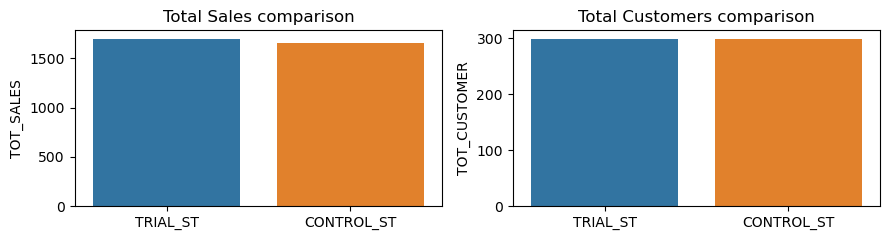

In [18]:
#Comparing data of trial store and control store
x=comparTable
fig =plt.figure(figsize=(9,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])
plt.subplot(1,2,1)
plt.title("Total Sales comparison")
sns.barplot(x=x.index,y='TOT_SALES',data=x)
plt.subplot(1,2,2)
plt.title("Total Customers comparison")
sns.barplot(x=x.index,y='TOT_CUSTOMER',data=x)
plt.tight_layout()

### Sales of store-77

#### Assigning Variables for ease of code

In [19]:
columnName = 'TOT_SALES'

In [20]:
scalingFactor = calcScalingFactor(TrialStoreNo,ControlStoreNo,columnName)
scalingFactor

1.023617303289553

#### Making dataframes needed for Control & Trial Center

In [21]:
controlStoredata = allTimeData.loc[ControlStoreNo].copy()
trialstoredata = allTimeData.loc[TrialStoreNo].copy()

#### Applying scaling factor

In [22]:
#After scaling
scaleddata=controlStoredata[[columnName]]*scalingFactor
scaleddata.head()

,TOT_SALES
MONTH_ID,
201807,297.565550
201808,292.652187
201809,233.998916
201810,190.085733
201811,216.597421


In [23]:
percentDiff_Sales = abs(scaleddata[[columnName]]-trialstoredata[[columnName]])*100/scaleddata[[columnName]]
percentDiff_Sales.head()

,TOT_SALES
MONTH_ID,
201807,0.257271
201808,12.694997
201809,3.760238
201810,7.583035
201811,13.251579


In [24]:
#Finding means and std. deviation
meanControl = scaleddata.loc[201902:201904].copy()
m_Cont = meanControl[columnName].mean()
m_Cont = round(m_Cont,2)

meanTrial = trialstoredata.loc[201902:201904].copy()
m_Trial = meanTrial[columnName].mean()
m_Trial = round(m_Trial,2)

stdDev = (percentDiff_Sales.loc[:201901]).std()
stdDev = stdDev[columnName]
stdDev = round(stdDev,4)

print("Mean of scaled control store = {}".format(m_Cont))
print("Mean of Trial store = {}".format(m_Trial))
print("Standard deviation of data = {}".format(stdDev))

Mean of scaled control store = 205.3
Mean of Trial store = 259.0
Standard deviation of data = 4.9941


In [25]:
# Performing t-test for alpha=0.05
from scipy.stats import t
#Calculating t-statistic
t_stat = abs(m_Cont-m_Trial)/stdDev
t_stat = round(t_stat,4)
#Calculating critical t-value
alpha=0.05
degree = 8-1
cv_t = t.ppf(1-alpha, degree)
cv_t = round(cv_t,4)
print("t-statistic = {}".format(t_stat))
print("t-critical = {}".format(cv_t))

t-statistic = 10.7527
t-critical = 1.8946


#### Visualizing our data

In [26]:
newName = "Total_Sales"
# Data of CONTROL STORE
tmp_Controldf = controlStoredata.reset_index()
tmp_Controldf = tmp_Controldf[['MONTH_ID',columnName]]
tmp_Controldf['Store_Type']="Control_Store"
tmp_Controldf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Controldf.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,290.7,Control_Store
1,201808,285.9,Control_Store
2,201809,228.6,Control_Store
3,201810,185.7,Control_Store
4,201811,211.6,Control_Store


In [27]:
# Data of TRIAL STORE
tmp_Trialdf = trialstoredata.reset_index()
tmp_Trialdf = tmp_Trialdf[['MONTH_ID',columnName]]
tmp_Trialdf['Store_Type']="Trial_Store"
tmp_Trialdf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Trialdf.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,296.8,Trial_Store
1,201808,255.5,Trial_Store
2,201809,225.2,Trial_Store
3,201810,204.5,Trial_Store
4,201811,245.3,Trial_Store


In [28]:
# Data of CONTROL store with 95% confidence
pastSales_Control05 = tmp_Controldf.copy()
pastSales_Control05[newName] = pastSales_Control05[newName]  - (stdDev*2)
pastSales_Control05['Store_Type'] = "Control 5 % Confidence"
pastSales_Control05.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,280.7118,Control 5 % Confidence
1,201808,275.9118,Control 5 % Confidence
2,201809,218.6118,Control 5 % Confidence
3,201810,175.7118,Control 5 % Confidence
4,201811,201.6118,Control 5 % Confidence


In [29]:
# Data of CONTROL store with 5% confidence
pastSales_Control95 = tmp_Controldf.copy()
pastSales_Control95[newName] = pastSales_Control95[newName]  + (stdDev*2)
pastSales_Control95['Store_Type'] = "Control 95 % Confidence"
pastSales_Control95.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,300.6882,Control 95 % Confidence
1,201808,295.8882,Control 95 % Confidence
2,201809,238.5882,Control 95 % Confidence
3,201810,195.6882,Control 95 % Confidence
4,201811,221.5882,Control 95 % Confidence


In [30]:
# Merging all data into one dataframe
pastSales = pd.DataFrame(columns=['Store_Type',newName,'Transaction_Month'])
pastSales = pd.concat([pastSales,pastSales_Control05,tmp_Trialdf,tmp_Controldf,pastSales_Control95])
pastSales.reset_index(inplace = True)
pastSales.drop('index',axis=1,inplace=True)
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store_Type         48 non-null     object 
 1   Total_Sales        48 non-null     float64
 2   Transaction_Month  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [31]:
trialPeriodSales = pastSales[(pastSales['Transaction_Month']<201905) & (pastSales['Transaction_Month']>201901)]
trialPeriodSales

,Store_Type,Total_Sales,Transaction_Month
7,Control 5 % Confidence,234.0118,201902
8,Control 5 % Confidence,189.1118,201903
9,Control 5 % Confidence,148.6118,201904
19,Trial_Store,235.0000,201902
20,Trial_Store,278.5000,201903
21,Trial_Store,263.5000,201904
31,Control_Store,244.0000,201902
32,Control_Store,199.1000,201903
33,Control_Store,158.6000,201904
43,Control 95 % Confidence,253.9882,201902


In [32]:
#Deleting temporary dataframes
del pastSales_Control05
del pastSales_Control95
del tmp_Controldf
del tmp_Trialdf

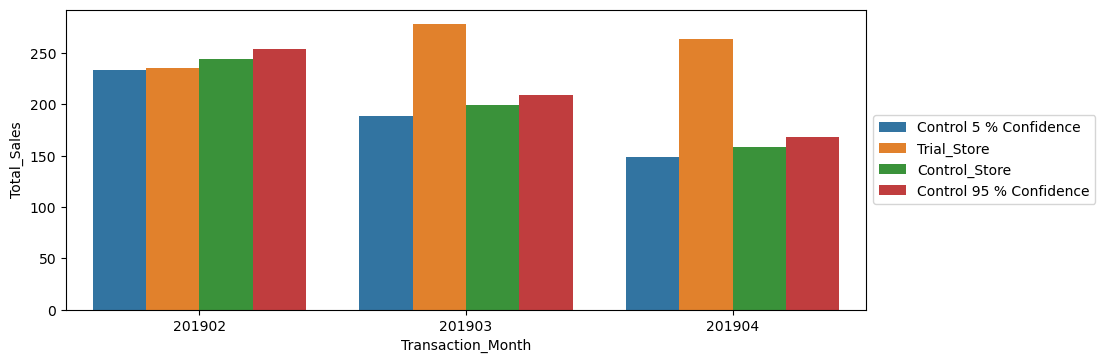

In [33]:
fig =plt.figure(figsize=(8,3),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(y=newName,x='Transaction_Month',hue='Store_Type',data=trialPeriodSales)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**The above graph shows that the trial in store 77 is significantly different to its control store in the trial period ;
This is because the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months**
____

### Customers of Store-77

In [34]:
columnName = 'TOTAL_CUSTOMERS'

In [35]:
scalingFactor = calcScalingFactor(TrialStoreNo,ControlStoreNo,columnName)
scalingFactor

1.0033557046979866

In [36]:
#Making data frames to be used later
controlStoredata = allTimeData.loc[ControlStoreNo].copy()
trialstoredata = allTimeData.loc[TrialStoreNo].copy()

In [37]:
#After scaling
scaleddata=controlStoredata[[columnName]]*scalingFactor
scaleddata.head()

,TOTAL_CUSTOMERS
MONTH_ID,
201807,51.171141
201808,48.161074
201809,42.140940
201810,35.117450
201811,40.134228


In [38]:
percentDiff_Sales = abs(scaleddata[[columnName]]-trialstoredata[[columnName]])*100/scaleddata[[columnName]]
percentDiff_Sales.head()

,TOTAL_CUSTOMERS
MONTH_ID,
201807,0.334448
201808,2.410814
201809,0.334448
201810,5.360726
201811,2.157191


In [39]:
#Finding means and std. deviation
meanControl = scaleddata.loc[201902:201904].copy()
m_Cont = meanControl[columnName].mean()
m_Cont = round(m_Cont,2)

meanTrial = trialstoredata.loc[201902:201904].copy()
m_Trial = meanTrial[columnName].mean()
m_Trial = round(m_Trial,2)

stdDev = (percentDiff_Sales.loc[:201901]).std()
stdDev = stdDev[columnName]
stdDev = round(stdDev,4)

print("Mean of scaled control store = {}".format(m_Cont))
print("Mean of Trial store = {}".format(m_Trial))
print("Standard deviation of data = {}".format(stdDev))

Mean of scaled control store = 38.46
Mean of Trial store = 47.33
Standard deviation of data = 1.8241


In [40]:
# Performing t-test for alpha=0.05
from scipy.stats import t
#Calculating t-statistic
t_stat = abs(m_Cont-m_Trial)/stdDev
t_stat = round(t_stat,4)
#Calculating critical t-value
alpha=0.05
degree = 8-1
cv_t = t.ppf(1-alpha, degree)
cv_t = round(cv_t,4)
print("t-statistic = {}".format(t_stat))
print("t-critical = {}".format(cv_t))

t-statistic = 4.8627
t-critical = 1.8946


In [41]:
# To visualize data
newName = "Total_Customers"
# Data of CONTROL STORE
tmp_Controldf = controlStoredata.reset_index()
tmp_Controldf = tmp_Controldf[['MONTH_ID',columnName]]
tmp_Controldf['Store_Type']="Control_Store"
tmp_Controldf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Controldf.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,51,Control_Store
1,201808,48,Control_Store
2,201809,42,Control_Store
3,201810,35,Control_Store
4,201811,40,Control_Store


In [42]:
# Data of TRIAL STORE
tmp_Trialdf = trialstoredata.reset_index()
tmp_Trialdf = tmp_Trialdf[['MONTH_ID',columnName]]
tmp_Trialdf['Store_Type']="Trial_Store"
tmp_Trialdf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Trialdf.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,51,Trial_Store
1,201808,47,Trial_Store
2,201809,42,Trial_Store
3,201810,37,Trial_Store
4,201811,41,Trial_Store


In [43]:
# Data of CONTROL store with 5% confidence
pastSales_Control05 = tmp_Controldf.copy()
pastSales_Control05[newName] = pastSales_Control05[newName]  - (stdDev*2)
pastSales_Control05['Store_Type'] = "Control 5 % Confidence"
pastSales_Control05.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,47.3518,Control 5 % Confidence
1,201808,44.3518,Control 5 % Confidence
2,201809,38.3518,Control 5 % Confidence
3,201810,31.3518,Control 5 % Confidence
4,201811,36.3518,Control 5 % Confidence


In [44]:
# Data of CONTROL store with 95% confidence
pastSales_Control95 = tmp_Controldf.copy()
pastSales_Control95[newName] = pastSales_Control95[newName]  + (stdDev*2)
pastSales_Control95['Store_Type'] = "Control 95 % Confidence"
pastSales_Control95.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,54.6482,Control 95 % Confidence
1,201808,51.6482,Control 95 % Confidence
2,201809,45.6482,Control 95 % Confidence
3,201810,38.6482,Control 95 % Confidence
4,201811,43.6482,Control 95 % Confidence


In [45]:
# Merging all data into one dataframe
pastSales = pd.DataFrame(columns=['Store_Type',newName,'Transaction_Month'])
pastSales = pd.concat([pastSales,pastSales_Control05,tmp_Trialdf,tmp_Controldf,pastSales_Control95])
pastSales.reset_index(inplace = True)
pastSales.drop('index',axis=1,inplace=True)
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store_Type         48 non-null     object 
 1   Total_Customers    48 non-null     float64
 2   Transaction_Month  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [46]:
trialPeriodSales = pastSales[(pastSales['Transaction_Month']<201905) & (pastSales['Transaction_Month']>201901)]
trialPeriodSales

,Store_Type,Total_Customers,Transaction_Month
7,Control 5 % Confidence,41.3518,201902
8,Control 5 % Confidence,36.3518,201903
9,Control 5 % Confidence,26.3518,201904
19,Trial_Store,45.0000,201902
20,Trial_Store,50.0000,201903
21,Trial_Store,47.0000,201904
31,Control_Store,45.0000,201902
32,Control_Store,40.0000,201903
33,Control_Store,30.0000,201904
43,Control 95 % Confidence,48.6482,201902


In [47]:
#Deleting temporary dataframes
del pastSales_Control05
del pastSales_Control95
del tmp_Controldf
del tmp_Trialdf

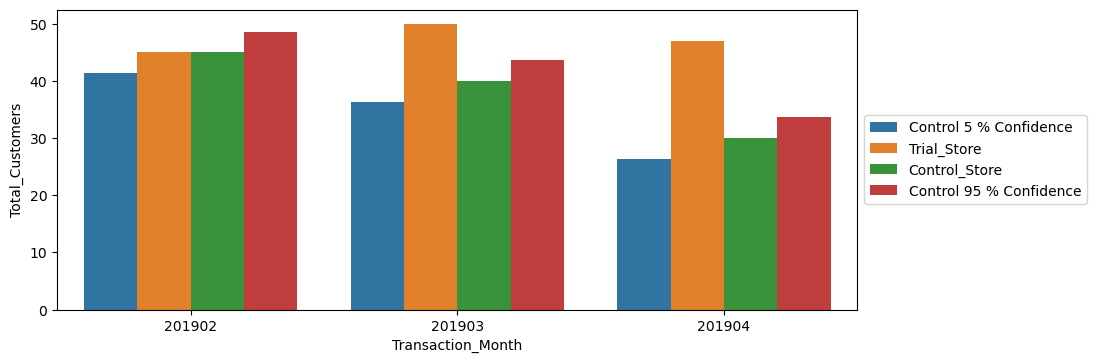

In [48]:
fig =plt.figure(figsize=(8,3),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(y=newName,x='Transaction_Month',hue='Store_Type',data=trialPeriodSales)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### The above graph shows that the trial in store 77 is significantly different to its control store in the trial period ; This is because the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months
___

## Store-86 : Performance Analysis

In [49]:
store86 = calcTotalScore(corrSt_86,magnDist86)
print("Control store for Store 86 is Store {}".format(store86))

Control store for Store 86 is Store 155


In [50]:
#Changing the value of variables
TrialStoreNo = 86
ControlStoreNo = store86

In [51]:
control_Sales = fetchVal(ControlStoreNo,'TOT_SALES')
control_Cust = fetchVal(ControlStoreNo ,'TOTAL_CUSTOMERS')
trial_Sales = fetchVal(TrialStoreNo,'TOT_SALES')
trial_Cust = fetchVal(TrialStoreNo,'TOTAL_CUSTOMERS')

#Creating new dataframe 'compartable'
comparTable = pd.DataFrame(index=['TOT_SALES','TOT_CUSTOMER'],columns=['TRIAL_ST','CONTROL_ST'])
comparTable['TRIAL_ST']['TOT_SALES'] = trial_Sales
comparTable['TRIAL_ST']['TOT_CUSTOMER'] = trial_Cust
comparTable['CONTROL_ST']['TOT_SALES'] = control_Sales
comparTable['CONTROL_ST']['TOT_CUSTOMER'] = control_Cust
comparTable=comparTable.transpose()

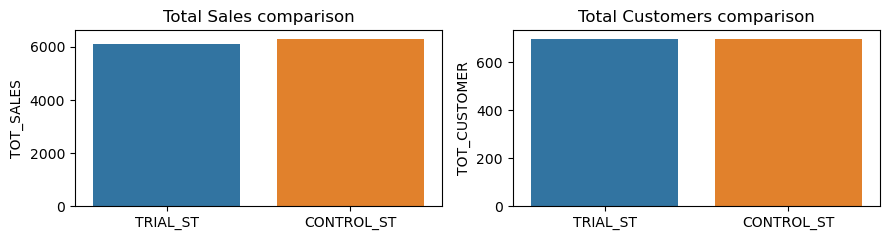

In [52]:
#Comparing data of trial store and control store
x=comparTable
fig =plt.figure(figsize=(9,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])
plt.subplot(1,2,1)
plt.title("Total Sales comparison")
sns.barplot(x=x.index,y='TOT_SALES',data=x)
plt.subplot(1,2,2)
plt.title("Total Customers comparison")
sns.barplot(x=x.index,y='TOT_CUSTOMER',data=x)
plt.tight_layout()

___
### Sales of Store-86

In [53]:
columnName = 'TOT_SALES'

In [54]:
scalingFactor = calcScalingFactor(TrialStoreNo,ControlStoreNo,columnName)
scalingFactor

0.9700651481287746

In [55]:
controlStoredata = allTimeData.loc[ControlStoreNo].copy()
trialstoredata = allTimeData.loc[TrialStoreNo].copy()

In [56]:
#After scaling
scaleddata=controlStoredata[[columnName]]*scalingFactor
scaleddata.head()

,TOT_SALES
MONTH_ID,
201807,896.922236
201808,759.269991
201809,984.034086
201810,934.948790
201811,871.894555


In [57]:
percentDiff_Sales = abs(scaleddata[[columnName]]-trialstoredata[[columnName]])*100/scaleddata[[columnName]]
percentDiff_Sales.head()

,TOT_SALES
MONTH_ID,
201807,0.526493
201808,0.629553
201809,7.056065
201810,1.438711
201811,5.287961


In [58]:
#Finding means and std. deviation
meanControl = scaleddata.loc[201902:201904].copy()
m_Cont = meanControl[columnName].mean()
m_Cont = round(m_Cont,2)

meanTrial = trialstoredata.loc[201902:201904].copy()
m_Trial = meanTrial[columnName].mean()
m_Trial = round(m_Trial,2)

stdDev = (percentDiff_Sales.loc[:201901]).std()
stdDev = stdDev[columnName]
stdDev = round(stdDev,4)

print("Mean of scaled control store = {}".format(m_Cont))
print("Mean of Trial store = {}".format(m_Trial))
print("Standard deviation of data = {}".format(stdDev))

Mean of scaled control store = 821.39
Mean of Trial store = 929.4
Standard deviation of data = 2.5834


In [59]:
# Performing t-test for alpha=0.05
from scipy.stats import t
#Calculating t-statistic
t_stat = abs(m_Cont-m_Trial)/stdDev
t_stat = round(t_stat,4)
#Calculating critical t-value
alpha=0.05
degree = 8-1
cv_t = t.ppf(1-alpha, degree)
cv_t = round(cv_t,4)
print("t-statistic = {}".format(t_stat))
print("t-critical = {}".format(cv_t))

t-statistic = 41.8092
t-critical = 1.8946


In [60]:
newName = "Total_Sales"
# Data of CONTROL STORE
tmp_Controldf = controlStoredata.reset_index()
tmp_Controldf = tmp_Controldf[['MONTH_ID',columnName]]
tmp_Controldf['Store_Type']="Control_Store"
tmp_Controldf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Controldf.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,924.6,Control_Store
1,201808,782.7,Control_Store
2,201809,1014.4,Control_Store
3,201810,963.8,Control_Store
4,201811,898.8,Control_Store


In [61]:
# Data of TRIAL STORE
tmp_Trialdf = trialstoredata.reset_index()
tmp_Trialdf = tmp_Trialdf[['MONTH_ID',columnName]]
tmp_Trialdf['Store_Type']="Trial_Store"
tmp_Trialdf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Trialdf.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,892.20,Trial_Store
1,201808,764.05,Trial_Store
2,201809,914.60,Trial_Store
3,201810,948.40,Trial_Store
4,201811,918.00,Trial_Store


In [62]:
# Data of CONTROL store with 95% confidence
pastSales_Control05 = tmp_Controldf.copy()
pastSales_Control05[newName] = pastSales_Control05[newName]  - (stdDev*2)
pastSales_Control05['Store_Type'] = "Control 5 % Confidence"
pastSales_Control05.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,919.4332,Control 5 % Confidence
1,201808,777.5332,Control 5 % Confidence
2,201809,1009.2332,Control 5 % Confidence
3,201810,958.6332,Control 5 % Confidence
4,201811,893.6332,Control 5 % Confidence


In [63]:
# Data of CONTROL store with 5% confidence
pastSales_Control95 = tmp_Controldf.copy()
pastSales_Control95[newName] = pastSales_Control95[newName]  + (stdDev*2)
pastSales_Control95['Store_Type'] = "Control 95 % Confidence"
pastSales_Control95.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,929.7668,Control 95 % Confidence
1,201808,787.8668,Control 95 % Confidence
2,201809,1019.5668,Control 95 % Confidence
3,201810,968.9668,Control 95 % Confidence
4,201811,903.9668,Control 95 % Confidence


In [64]:
# Merging all data into one dataframe
pastSales = pd.DataFrame(columns=['Store_Type',newName,'Transaction_Month'])
pastSales = pd.concat([pastSales,pastSales_Control05,tmp_Trialdf,tmp_Controldf,pastSales_Control95])
pastSales.reset_index(inplace = True)
pastSales.drop('index',axis=1,inplace=True)
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store_Type         48 non-null     object 
 1   Total_Sales        48 non-null     float64
 2   Transaction_Month  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [65]:
trialPeriodSales = pastSales[(pastSales['Transaction_Month']<201905) & (pastSales['Transaction_Month']>201901)]
trialPeriodSales

,Store_Type,Total_Sales,Transaction_Month
7,Control 5 % Confidence,886.0332,201902
8,Control 5 % Confidence,799.2332,201903
9,Control 5 % Confidence,839.4332,201904
19,Trial_Store,913.2000,201902
20,Trial_Store,1026.8000,201903
21,Trial_Store,848.2000,201904
31,Control_Store,891.2000,201902
32,Control_Store,804.4000,201903
33,Control_Store,844.6000,201904
43,Control 95 % Confidence,896.3668,201902


In [66]:
#Deleting temporary dataframes
del pastSales_Control05
del pastSales_Control95
del tmp_Controldf
del tmp_Trialdf

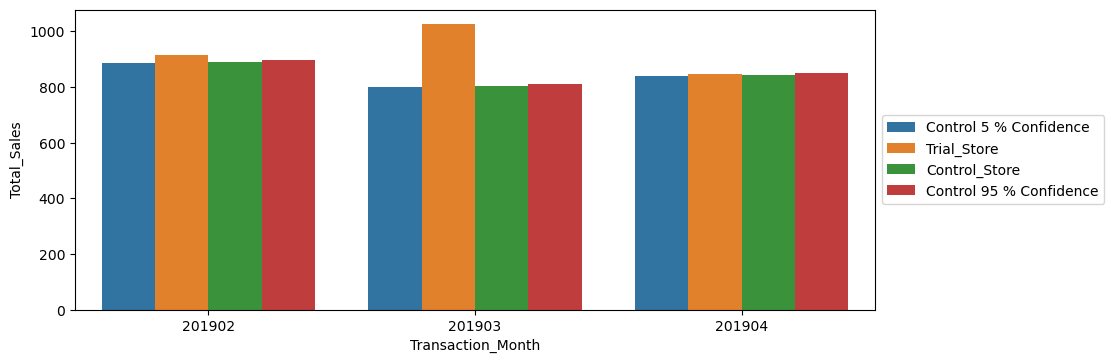

In [67]:
fig =plt.figure(figsize=(8,3),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(y=newName,x='Transaction_Month',hue='Store_Type',data=trialPeriodSales)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance almost lies inside the 5% to 95% confidence interval of the control store in two of the three trial months
___

### Customers of Store-86

In [68]:
columnName = 'TOTAL_CUSTOMERS'

In [69]:
scalingFactor = calcScalingFactor(TrialStoreNo,ControlStoreNo,columnName)
scalingFactor

1.0

In [70]:
#Making data frames to be used later
controlStoredata = allTimeData.loc[ControlStoreNo].copy()
trialstoredata = allTimeData.loc[TrialStoreNo].copy()

In [71]:
#After scaling
scaleddata=controlStoredata[[columnName]]*scalingFactor
scaleddata.head()

,TOTAL_CUSTOMERS
MONTH_ID,
201807,101.0
201808,91.0
201809,103.0
201810,108.0
201811,101.0


In [72]:
percentDiff_Sales = abs(scaleddata[[columnName]]-trialstoredata[[columnName]])*100/scaleddata[[columnName]]
percentDiff_Sales.head()

,TOTAL_CUSTOMERS
MONTH_ID,
201807,1.980198
201808,3.296703
201809,0.000000
201810,0.925926
201811,0.990099


In [73]:
#Finding means and std. deviation
meanControl = scaleddata.loc[201902:201904].copy()
m_Cont = meanControl[columnName].mean()
m_Cont = round(m_Cont,2)

meanTrial = trialstoredata.loc[201902:201904].copy()
m_Trial = meanTrial[columnName].mean()
m_Trial = round(m_Trial,2)

stdDev = (percentDiff_Sales.loc[:201901]).std()
stdDev = stdDev[columnName]
stdDev = round(stdDev,4)

print("Mean of scaled control store = {}".format(m_Cont))
print("Mean of Trial store = {}".format(m_Trial))
print("Standard deviation of data = {}".format(stdDev))

Mean of scaled control store = 96.0
Mean of Trial store = 109.0
Standard deviation of data = 1.0687


In [74]:
# Performing t-test for alpha=0.05
from scipy.stats import t
#Calculating t-statistic
t_stat = abs(m_Cont-m_Trial)/stdDev
t_stat = round(t_stat,4)
#Calculating critical t-value
alpha=0.05
degree = 8-1
cv_t = t.ppf(1-alpha, degree)
cv_t = round(cv_t,4)
print("t-statistic = {}".format(t_stat))
print("t-critical = {}".format(cv_t))

t-statistic = 12.1643
t-critical = 1.8946


In [75]:
# To visualize data
newName = "Total_Customers"
# Data of CONTROL STORE
tmp_Controldf = controlStoredata.reset_index()
tmp_Controldf = tmp_Controldf[['MONTH_ID',columnName]]
tmp_Controldf['Store_Type']="Control_Store"
tmp_Controldf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Controldf.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,101,Control_Store
1,201808,91,Control_Store
2,201809,103,Control_Store
3,201810,108,Control_Store
4,201811,101,Control_Store


In [76]:
# Data of TRIAL STORE
tmp_Trialdf = trialstoredata.reset_index()
tmp_Trialdf = tmp_Trialdf[['MONTH_ID',columnName]]
tmp_Trialdf['Store_Type']="Trial_Store"
tmp_Trialdf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Trialdf.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,99,Trial_Store
1,201808,94,Trial_Store
2,201809,103,Trial_Store
3,201810,109,Trial_Store
4,201811,100,Trial_Store


In [77]:
# Data of CONTROL store with 5% confidence
pastSales_Control05 = tmp_Controldf.copy()
pastSales_Control05[newName] = pastSales_Control05[newName]  - (stdDev*2)
pastSales_Control05['Store_Type'] = "Control 5 % Confidence"
pastSales_Control05.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,98.8626,Control 5 % Confidence
1,201808,88.8626,Control 5 % Confidence
2,201809,100.8626,Control 5 % Confidence
3,201810,105.8626,Control 5 % Confidence
4,201811,98.8626,Control 5 % Confidence


In [78]:
# Data of CONTROL store with 95% confidence
pastSales_Control95 = tmp_Controldf.copy()
pastSales_Control95[newName] = pastSales_Control95[newName]  + (stdDev*2)
pastSales_Control95['Store_Type'] = "Control 95 % Confidence"
pastSales_Control95.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,103.1374,Control 95 % Confidence
1,201808,93.1374,Control 95 % Confidence
2,201809,105.1374,Control 95 % Confidence
3,201810,110.1374,Control 95 % Confidence
4,201811,103.1374,Control 95 % Confidence


In [79]:
# Merging all data into one dataframe
pastSales = pd.DataFrame(columns=['Store_Type',newName,'Transaction_Month'])
pastSales = pd.concat([pastSales,pastSales_Control05,tmp_Trialdf,tmp_Controldf,pastSales_Control95])
pastSales.reset_index(inplace = True)
pastSales.drop('index',axis=1,inplace=True)
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store_Type         48 non-null     object 
 1   Total_Customers    48 non-null     float64
 2   Transaction_Month  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [80]:
trialPeriodSales = pastSales[(pastSales['Transaction_Month']<201905) & (pastSales['Transaction_Month']>201901)]
trialPeriodSales

,Store_Type,Total_Customers,Transaction_Month
7,Control 5 % Confidence,92.8626,201902
8,Control 5 % Confidence,91.8626,201903
9,Control 5 % Confidence,96.8626,201904
19,Trial_Store,107.0000,201902
20,Trial_Store,115.0000,201903
21,Trial_Store,105.0000,201904
31,Control_Store,95.0000,201902
32,Control_Store,94.0000,201903
33,Control_Store,99.0000,201904
43,Control 95 % Confidence,97.1374,201902


In [81]:
#Deleting temporary dataframes
del pastSales_Control05
del pastSales_Control95
del tmp_Controldf
del tmp_Trialdf

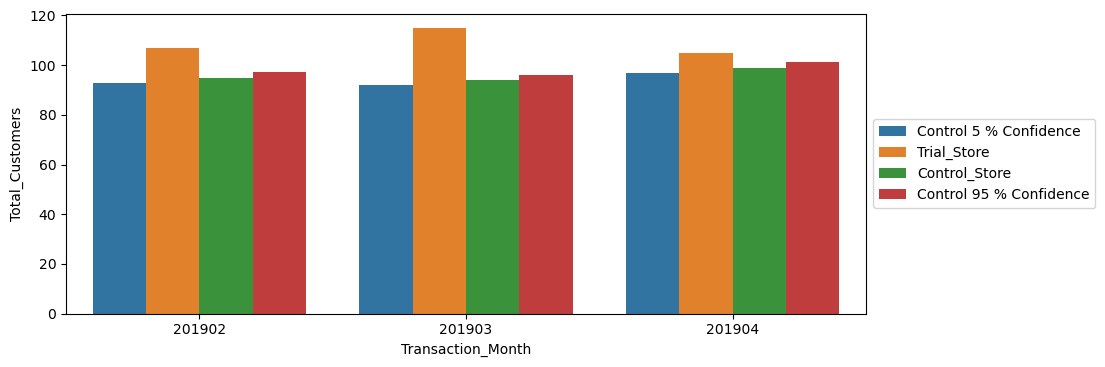

In [82]:
fig =plt.figure(figsize=(8,3),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(y=newName,x='Transaction_Month',hue='Store_Type',data=trialPeriodSales)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.
___


## Store-88 : Performance Analysis

In [83]:
#To calculate total score and find control center
def calcScore(corrTbl,magnTbl):
    combinedScoreTable = 0
    #After merging all 4 scores
    #combinedScoreTable = pd.concat([corrTbl,magnTbl],axis=1)
    combinedScoreTable = pd.concat([magnTbl],axis=1)
    #Calculating total score
    combinedScoreTable['Total_Score']=combinedScoreTable.mean(axis=1)
    #Maximum score
    storeNBR = combinedScoreTable[combinedScoreTable['Total_Score']==combinedScoreTable['Total_Score'].max()].index[0]
    return storeNBR

In [84]:
store88 = calcScore(corrSt_88,magnDist88)
print("Control store for Store 88 is Store {}".format(store88))

Control store for Store 88 is Store 237


In [90]:
#Changing the value of variables
TrialStoreNo = 88
ControlStoreNo = store88

In [91]:
control_Sales = fetchVal(ControlStoreNo,'TOT_SALES')
control_Cust = fetchVal(ControlStoreNo ,'TOTAL_CUSTOMERS')
trial_Sales = fetchVal(TrialStoreNo,'TOT_SALES')
trial_Cust = fetchVal(TrialStoreNo,'TOTAL_CUSTOMERS')

#Creating new dataframe 'compartable'
comparTable = pd.DataFrame(index=['TOT_SALES','TOT_CUSTOMER'],columns=['TRIAL_ST','CONTROL_ST'])
comparTable['TRIAL_ST']['TOT_SALES'] = trial_Sales
comparTable['TRIAL_ST']['TOT_CUSTOMER'] = trial_Cust
comparTable['CONTROL_ST']['TOT_SALES'] = control_Sales
comparTable['CONTROL_ST']['TOT_CUSTOMER'] = control_Cust
comparTable=comparTable.transpose()

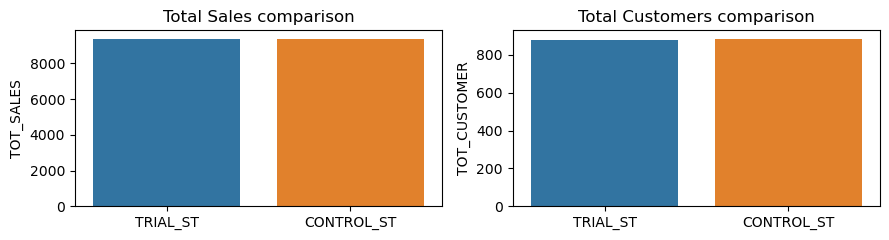

In [92]:
#Comparing data of trial store and control store
x=comparTable
fig =plt.figure(figsize=(9,2.5),dpi=100)
ax = fig.add_axes([0,0,1,1])
plt.subplot(1,2,1)
plt.title("Total Sales comparison")
sns.barplot(x=x.index,y='TOT_SALES',data=x)
plt.subplot(1,2,2)
plt.title("Total Customers comparison")
sns.barplot(x=x.index,y='TOT_CUSTOMER',data=x)
plt.tight_layout()

___
### Sales of Store-88

In [93]:
columnName = 'TOT_SALES'

In [95]:
scalingFactor = calcScalingFactor(TrialStoreNo,ControlStoreNo,columnName)
scalingFactor

1.001558330664959

In [96]:
controlStoredata = allTimeData.loc[ControlStoreNo].copy()
trialstoredata = allTimeData.loc[TrialStoreNo].copy()

In [97]:
#After scaling
scaleddata=controlStoredata[[columnName]]*scalingFactor
scaleddata.head()

,TOT_SALES
MONTH_ID,
201807,1450.657086
201808,1369.931485
201809,1324.260425
201810,1350.401097
201811,1399.777923


In [98]:
percentDiff_Sales = abs(scaleddata[[columnName]]-trialstoredata[[columnName]])*100/scaleddata[[columnName]]
percentDiff_Sales.head()

,TOT_SALES
MONTH_ID,
201807,9.696095
201808,3.367430
201809,7.456205
201810,0.148023
201811,1.212901


In [99]:
#Finding means and std. deviation
meanControl = scaleddata.loc[201902:201904].copy()
m_Cont = meanControl[columnName].mean()
m_Cont = round(m_Cont,2)

meanTrial = trialstoredata.loc[201902:201904].copy()
m_Trial = meanTrial[columnName].mean()
m_Trial = round(m_Trial,2)

stdDev = (percentDiff_Sales.loc[:201901]).std()
stdDev = stdDev[columnName]
stdDev = round(stdDev,4)

print("Mean of scaled control store = {}".format(m_Cont))
print("Mean of Trial store = {}".format(m_Trial))
print("Standard deviation of data = {}".format(stdDev))

Mean of scaled control store = 1274.52
Mean of Trial store = 1428.93
Standard deviation of data = 3.3468


In [100]:
# Performing t-test for alpha=0.05
from scipy.stats import t
#Calculating t-statistic
t_stat = abs(m_Cont-m_Trial)/stdDev
t_stat = round(t_stat,4)
#Calculating critical t-value
alpha=0.05
degree = 8-1
cv_t = t.ppf(1-alpha, degree)
cv_t = round(cv_t,4)
print("t-statistic = {}".format(t_stat))
print("t-critical = {}".format(cv_t))

t-statistic = 46.1366
t-critical = 1.8946


In [101]:
newName = "Total_Sales"
# Data of CONTROL STORE
tmp_Controldf = controlStoredata.reset_index()
tmp_Controldf = tmp_Controldf[['MONTH_ID',columnName]]
tmp_Controldf['Store_Type']="Control_Store"
tmp_Controldf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Controldf.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,1448.4,Control_Store
1,201808,1367.8,Control_Store
2,201809,1322.2,Control_Store
3,201810,1348.3,Control_Store
4,201811,1397.6,Control_Store


In [102]:
# Data of TRIAL STORE
tmp_Trialdf = trialstoredata.reset_index()
tmp_Trialdf = tmp_Trialdf[['MONTH_ID',columnName]]
tmp_Trialdf['Store_Type']="Trial_Store"
tmp_Trialdf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Trialdf.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,1310.0,Trial_Store
1,201808,1323.8,Trial_Store
2,201809,1423.0,Trial_Store
3,201810,1352.4,Trial_Store
4,201811,1382.8,Trial_Store


In [103]:
# Data of CONTROL store with 5% confidence
pastSales_Control05 = tmp_Controldf.copy()
pastSales_Control05[newName] = pastSales_Control05[newName]  - (stdDev*2)
pastSales_Control05['Store_Type'] = "Control 5 % Confidence"
pastSales_Control05.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,1441.7064,Control 5 % Confidence
1,201808,1361.1064,Control 5 % Confidence
2,201809,1315.5064,Control 5 % Confidence
3,201810,1341.6064,Control 5 % Confidence
4,201811,1390.9064,Control 5 % Confidence


In [104]:
# Data of CONTROL store with 95% confidence
pastSales_Control95 = tmp_Controldf.copy()
pastSales_Control95[newName] = pastSales_Control95[newName]  + (stdDev*2)
pastSales_Control95['Store_Type'] = "Control 95 % Confidence"
pastSales_Control95.head()

,Transaction_Month,Total_Sales,Store_Type
0,201807,1455.0936,Control 95 % Confidence
1,201808,1374.4936,Control 95 % Confidence
2,201809,1328.8936,Control 95 % Confidence
3,201810,1354.9936,Control 95 % Confidence
4,201811,1404.2936,Control 95 % Confidence


In [105]:
# Merging all data into one dataframe
pastSales = pd.DataFrame(columns=['Store_Type',newName,'Transaction_Month'])
pastSales = pd.concat([pastSales,pastSales_Control05,tmp_Trialdf,tmp_Controldf,pastSales_Control95])
pastSales.reset_index(inplace = True)
pastSales.drop('index',axis=1,inplace=True)
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store_Type         48 non-null     object 
 1   Total_Sales        48 non-null     float64
 2   Transaction_Month  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [106]:
trialPeriodSales = pastSales[(pastSales['Transaction_Month']<201905) & (pastSales['Transaction_Month']>201901)]
trialPeriodSales

,Store_Type,Total_Sales,Transaction_Month
7,Control 5 % Confidence,1398.1064,201902
8,Control 5 % Confidence,1201.5064,201903
9,Control 5 % Confidence,1197.9064,201904
19,Trial_Store,1370.2000,201902
20,Trial_Store,1477.2000,201903
21,Trial_Store,1439.4000,201904
31,Control_Store,1404.8000,201902
32,Control_Store,1208.2000,201903
33,Control_Store,1204.6000,201904
43,Control 95 % Confidence,1411.4936,201902


In [108]:
#Deleting temporary dataframes
del pastSales_Control05
del pastSales_Control95
del tmp_Controldf
del tmp_Trialdf

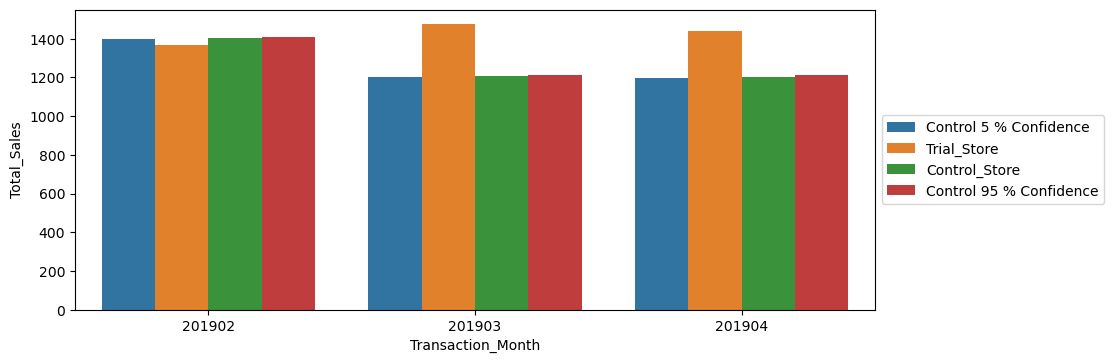

In [109]:
fig =plt.figure(figsize=(8,3),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(y=newName,x='Transaction_Month',hue='Store_Type',data=trialPeriodSales)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.
___

### Customers of Store-88

In [110]:
columnName = 'TOTAL_CUSTOMERS'

In [111]:
scalingFactor = calcScalingFactor(TrialStoreNo,ControlStoreNo,columnName)
scalingFactor

0.9943502824858758

In [112]:
#Making data frames to be used later
controlStoredata = allTimeData.loc[ControlStoreNo].copy()
trialstoredata = allTimeData.loc[TrialStoreNo].copy()

In [113]:
#After scaling
scaleddata=controlStoredata[[columnName]]*scalingFactor
scaleddata.head()

,TOTAL_CUSTOMERS
MONTH_ID,
201807,127.276836
201808,134.237288
201809,125.288136
201810,122.305085
201811,131.254237


In [114]:
percentDiff_Sales = abs(scaleddata[[columnName]]-trialstoredata[[columnName]])*100/scaleddata[[columnName]]
percentDiff_Sales.head()

,TOTAL_CUSTOMERS
MONTH_ID,
201807,1.353871
201808,2.411616
201809,1.028139
201810,0.568182
201811,0.955579


In [115]:
#Finding means and std. deviation
meanControl = scaleddata.loc[201902:201904].copy()
m_Cont = meanControl[columnName].mean()
m_Cont = round(m_Cont,2)

meanTrial = trialstoredata.loc[201902:201904].copy()
m_Trial = meanTrial[columnName].mean()
m_Trial = round(m_Trial,2)

stdDev = (percentDiff_Sales.loc[:201901]).std()
stdDev = stdDev[columnName]
stdDev = round(stdDev,4)

print("Mean of scaled control store = {}".format(m_Cont))
print("Mean of Trial store = {}".format(m_Trial))
print("Standard deviation of data = {}".format(stdDev))

Mean of scaled control store = 120.98
Mean of Trial store = 128.67
Standard deviation of data = 0.741


In [116]:
# Performing t-test for alpha=0.05
from scipy.stats import t
#Calculating t-statistic
t_stat = abs(m_Cont-m_Trial)/stdDev
t_stat = round(t_stat,4)
#Calculating critical t-value
alpha=0.05
degree = 8-1
cv_t = t.ppf(1-alpha, degree)
cv_t = round(cv_t,4)
print("t-statistic = {}".format(t_stat))
print("t-critical = {}".format(cv_t))

t-statistic = 10.3779
t-critical = 1.8946


In [117]:
# To visualize data
newName = "Total_Customers"
# Data of CONTROL STORE
tmp_Controldf = controlStoredata.reset_index()
tmp_Controldf = tmp_Controldf[['MONTH_ID',columnName]]
tmp_Controldf['Store_Type']="Control_Store"
tmp_Controldf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Controldf.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,128,Control_Store
1,201808,135,Control_Store
2,201809,126,Control_Store
3,201810,123,Control_Store
4,201811,132,Control_Store


In [118]:
# Data of TRIAL STORE
tmp_Trialdf = trialstoredata.reset_index()
tmp_Trialdf = tmp_Trialdf[['MONTH_ID',columnName]]
tmp_Trialdf['Store_Type']="Trial_Store"
tmp_Trialdf.rename(columns={'MONTH_ID':"Transaction_Month",columnName:newName},inplace=True)
tmp_Trialdf.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,129,Trial_Store
1,201808,131,Trial_Store
2,201809,124,Trial_Store
3,201810,123,Trial_Store
4,201811,130,Trial_Store


In [119]:
# Data of CONTROL store with 5% confidence
pastSales_Control05 = tmp_Controldf.copy()
pastSales_Control05[newName] = pastSales_Control05[newName]  - (stdDev*2)
pastSales_Control05['Store_Type'] = "Control 5 % Confidence"
pastSales_Control05.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,126.518,Control 5 % Confidence
1,201808,133.518,Control 5 % Confidence
2,201809,124.518,Control 5 % Confidence
3,201810,121.518,Control 5 % Confidence
4,201811,130.518,Control 5 % Confidence


In [120]:
# Data of CONTROL store with 95% confidence
pastSales_Control95 = tmp_Controldf.copy()
pastSales_Control95[newName] = pastSales_Control95[newName]  + (stdDev*2)
pastSales_Control95['Store_Type'] = "Control 95 % Confidence"
pastSales_Control95.head()

,Transaction_Month,Total_Customers,Store_Type
0,201807,129.482,Control 95 % Confidence
1,201808,136.482,Control 95 % Confidence
2,201809,127.482,Control 95 % Confidence
3,201810,124.482,Control 95 % Confidence
4,201811,133.482,Control 95 % Confidence


In [121]:
# Merging all data into one dataframe
pastSales = pd.DataFrame(columns=['Store_Type',newName,'Transaction_Month'])
pastSales = pd.concat([pastSales,pastSales_Control05,tmp_Trialdf,tmp_Controldf,pastSales_Control95])
pastSales.reset_index(inplace = True)
pastSales.drop('index',axis=1,inplace=True)
pastSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Store_Type         48 non-null     object 
 1   Total_Customers    48 non-null     float64
 2   Transaction_Month  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [122]:
trialPeriodSales = pastSales[(pastSales['Transaction_Month']<201905) & (pastSales['Transaction_Month']>201901)]
trialPeriodSales

,Store_Type,Total_Customers,Transaction_Month
7,Control 5 % Confidence,124.518,201902
8,Control 5 % Confidence,117.518,201903
9,Control 5 % Confidence,118.518,201904
19,Trial_Store,124.000,201902
20,Trial_Store,134.000,201903
21,Trial_Store,128.000,201904
31,Control_Store,126.000,201902
32,Control_Store,119.000,201903
33,Control_Store,120.000,201904
43,Control 95 % Confidence,127.482,201902


In [123]:
#Deleting temporary dataframes
del pastSales_Control05
del pastSales_Control95
del tmp_Controldf
del tmp_Trialdf

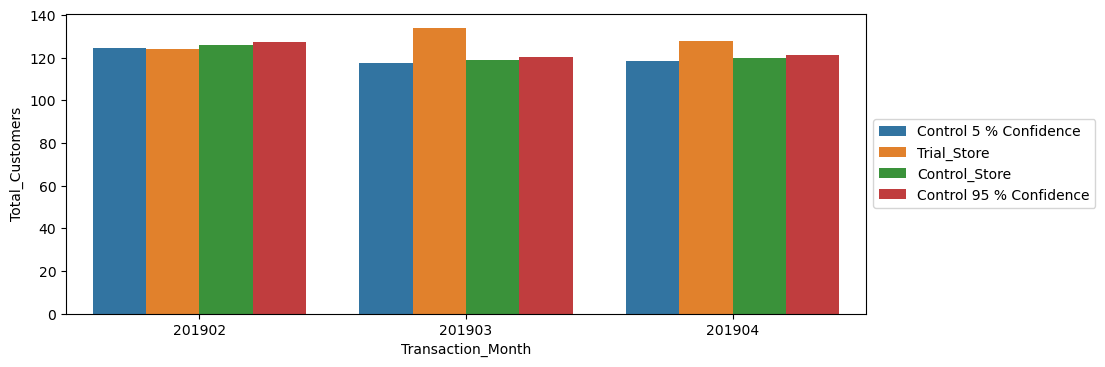

In [124]:
fig =plt.figure(figsize=(8,3),dpi=100)
ax = fig.add_axes([0,0,1,1])
sns.barplot(y=newName,x='Transaction_Month',hue='Store_Type',data=trialPeriodSales)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.
___

## Conclusion :--

#### We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.

#### The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. 

#### We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.